### Model Analisis

1. Analisis sentimen
2. Analisis jejaring sosial (di Gephi)
3. Pemodelan topik

In [18]:
# Libraries

import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from transformers import pipeline
from bertopic import BERTopic
import torch
import re
import datetime as dt
from wordcloud import WordCloud
from PIL import Image
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [12]:
# Combine all files

# Using glob to combine
file_pattern = "penyiaran*.csv"
csv_files = glob.glob(file_pattern)

if not csv_files:
    print(f"No file found in the {file_pattern}")
else:
    print(f"Found {len(csv_files)} files to combine")

Found 12 files to combine


In [17]:
# Combine file

dataframe_list = []
    
for file in csv_files:
    print(f"   -> Reading {file}...")
    df = pd.read_csv(file)
    dataframe_list.append(df)

    # Combine all DataFrames in the list into a single one.
    print("\nCombining all files...")
    combined_df = pd.concat(dataframe_list, ignore_index=True)

    # Save the combined DataFrame to a new CSV file.
    output_filename = "combined_penyiaran_tweets.csv"
    combined_df.to_csv(output_filename, index=False, encoding='utf-8-sig')

    print(f"Success! All data has been saved to '{output_filename}'.")
    print(f"Total number of tweets in the final file: {len(combined_df)}")

   -> Reading penyiaran1.csv...


/var/folders/_9/2hwxwfmd0qg0nfmbgvyy3pmm0000gn/T/ipykernel_9356/1601696965.py:7: DtypeWarning:

Columns (52,55,58,61,64,67,83,84,87,107,120,148,151,171,206,234,264,266,294,318,322,346,350,374,378,379,404,407,430,434,457,462,470,475,496,509,539,540,548,550,579,592,604,605,613,626,652,659,669,670,672,678,680,705,719,736,739,750,765,766,769,770,771,773,774,775,780,781,782,784,785,786,897,898,908,909,910,911,979,980,981,982,983,984,1011,1012,1040,1041,1042,1043,1111,1112,1113,1114,1115,1116,1143,1144,1172,1173,1174,1175,1243,1244,1245,1246,1247,1248,1275,1276,1315,1316,1317,1318,1319,1320,1321,1369,1371,1384,1392,1402,1404,1412,1416,1420,1424,1428,1432,1436,1437,1442,1445,1448,1452,1456,1461,1464,1469,1480,1488,1508,1509,1512,1514,1533,1541,1548,1549,1552,1560,1576,1583,1588,1589,1591,1592,1594,1618,1632,1648,1651,1662,1675,1676,1677,1678,1684,1698,1705,1727,1728,1755,1756,1757,1758,1762,1763,1764,1765,1766,1767,1774,1775,1780,1781,1782,1783,1787,1788,1789,1790,1791,1792,1799,1800,1805,180


Combining all files...
Success! All data has been saved to 'combined_penyiaran_tweets.csv'.
Total number of tweets in the final file: 1501
   -> Reading penyiaran2.csv...

Combining all files...
Success! All data has been saved to 'combined_penyiaran_tweets.csv'.
Total number of tweets in the final file: 1814
   -> Reading penyiaran3.csv...

Combining all files...
Success! All data has been saved to 'combined_penyiaran_tweets.csv'.
Total number of tweets in the final file: 1912
   -> Reading penyiaran7.csv...

Combining all files...
Success! All data has been saved to 'combined_penyiaran_tweets.csv'.
Total number of tweets in the final file: 1934
   -> Reading penyiaran6.csv...

Combining all files...
Success! All data has been saved to 'combined_penyiaran_tweets.csv'.
Total number of tweets in the final file: 1950
   -> Reading penyiaran4.csv...

Combining all files...
Success! All data has been saved to 'combined_penyiaran_tweets.csv'.
Total number of tweets in the final file: 2035


In [2]:
# Read the files

df_penyiaran = pd.read_csv("combined_penyiaran_tweets.csv")
df_penyiaran.head(10)

/var/folders/_9/2hwxwfmd0qg0nfmbgvyy3pmm0000gn/T/ipykernel_76285/3699528390.py:3: DtypeWarning:

Columns (0,1,2,10,12,13,14,15,20,31,34,37,40,43,46,49,52,55,58,61,64,67,78,79,82,83,84,87,93,94,95,96,102,107,120,145,148,151,152,153,156,157,158,161,166,171,206,211,234,239,264,266,292,294,318,322,323,346,350,351,374,378,379,404,407,430,434,435,457,462,470,475,485,487,488,496,500,501,509,511,513,514,524,526,527,537,539,540,548,550,552,553,563,566,576,579,592,602,604,605,613,615,617,618,626,628,630,631,641,643,644,646,652,654,659,669,670,672,678,680,700,705,708,719,722,724,725,726,727,728,729,730,731,732,734,735,736,738,739,740,744,745,746,749,750,751,765,766,767,769,770,771,773,774,775,780,781,782,784,785,786,885,886,888,889,891,892,894,895,897,898,908,909,910,911,979,980,981,982,983,984,1011,1012,1040,1041,1042,1043,1111,1112,1113,1114,1115,1116,1143,1144,1172,1173,1174,1175,1243,1244,1245,1246,1247,1248,1275,1276,1315,1316,1317,1318,1319,1320,1321,1345,1346,1351,1369,1371,1374,1384,1389,

,author/automatedBy,author/canDm,author/canMediaTag,author/coverPicture,author/createdAt,author/description,author/fastFollowersCount,author/favouritesCount,author/followers,author/following,...,quoted_tweet/extendedEntities/media/3/additional_media_info/source_user/user_results/result/tweet_counts/tweets,quoted_tweet/extendedEntities/media/3/additional_media_info/source_user/user_results/result/verification/is_blue_verified,quoted_tweet/extendedEntities/media/3/additional_media_info/source_user/user_results/result/website/url,quoted_tweet/extendedEntities/media/3/ext_alt_text,quoted_tweet_results/result/legacy/extended_entities/media/2/ext_alt_text,quoted_tweet_results/result/legacy/extended_entities/media/3/ext_alt_text,quoted_tweet_results/result/note_tweet/note_tweet_results/result/entity_set/hashtags/2/text,quoted_tweet_results/result/note_tweet/note_tweet_results/result/entity_set/urls/0/display_url,quoted_tweet_results/result/note_tweet/note_tweet_results/result/entity_set/urls/0/expanded_url,quoted_tweet_results/result/note_tweet/note_tweet_results/result/entity_set/urls/0/url
0,CPtanyarl,False,True,https://pbs.twimg.com/profile_banners/13716505...,Mon Apr 22 08:50:50 +0000 2013,NaN,0.0,722.0,4474543.0,14492.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,False,False,https://pbs.twimg.com/profile_banners/83182196...,Wed Feb 15 11:06:26 +0000 2017,NaN,0.0,16718.0,57.0,89.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,False,True,https://pbs.twimg.com/profile_banners/15041166...,Wed Mar 16 15:26:16 +0000 2022,NaN,0.0,12257.0,31036.0,357.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,True,True,https://pbs.twimg.com/profile_banners/78928522...,Thu Oct 01 15:20:30 +0000 2009,NaN,0.0,991.0,316.0,180.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,False,False,https://pbs.twimg.com/profile_banners/15580587...,Sun Jun 30 13:38:54 +0000 2013,NaN,0.0,2321.0,63.0,187.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,True,False,https://pbs.twimg.com/profile_banners/11792149...,Wed Oct 02 02:02:23 +0000 2019,NaN,0.0,884.0,215.0,692.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,True,False,https://pbs.twimg.com/profile_banners/26516795...,Wed Jul 16 18:09:31 +0000 2014,NaN,0.0,6921.0,338.0,1279.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,True,False,https://pbs.twimg.com/profile_banners/12441364...,Sun Mar 29 05:37:00 +0000 2020,NaN,0.0,8351.0,1008.0,2861.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,False,True,https://pbs.twimg.com/profile_banners/10822585...,Mon Jan 07 12:51:48 +0000 2019,NaN,0.0,965.0,97.0,155.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,False,True,NaN,Sat May 04 16:41:22 +0000 2024,NaN,0.0,1.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
df_penyiaran["text"]

0       💚 Guys jadi ini RUU Penyiaran gimana ya? Disah...
1       surpres RUU perampasan aset lupa nyimpen kah? ...
2       Halah K O N T O L.!!!\n\nKami Tau Kalau Tujuan...
3       Jujur gw penasaran sama isu/kasus apa yang bak...
4       @pandji Revisi UU yang numpuk di tahun ini ban...
                              ...                        
2469    From KaitoEasyAPI, a reminder:Our API pricing ...
2470    From KaitoEasyAPI, a reminder:Our API pricing ...
2471    From KaitoEasyAPI, a reminder:Our API pricing ...
2472    From KaitoEasyAPI, a reminder:Our API pricing ...
2473    From KaitoEasyAPI, a reminder:Our API pricing ...
Name: text, Length: 2474, dtype: object

In [3]:
# Pre-processing for sentiment analysis

df_sentiment = df_penyiaran[["text"]]
len(df_sentiment)

2474

In [4]:
# Text cleaning

def bersihkan_teks(teks):
    # Hapus URL
    teks = re.sub(r'http\S+|www\S+', '', teks)
    # Hapus mentions (@username)
    teks = re.sub(r'@\w+', '', teks)
    # Ganti &amp; menjadi 'dan'
    teks = re.sub(r'&amp;', ' dan ', teks)
    # Hapus karakter baris baru dan spasi aneh
    teks = re.sub(r'[\n\xa0]+', ' ', teks)
    # Hapus teks sampah dari sistem
    if "KaitoEasyAPI" in teks:
        return "" # Kembalikan string kosong agar bisa dihapus nanti
    # Hapus spasi berlebih
    teks = re.sub(r'\s+', ' ', teks).strip()
    return teks

df_sentiment['text_bersih'] = df_sentiment['text'].astype(str).apply(bersihkan_teks)
df_sentiment.drop(df_sentiment[df_sentiment['text_bersih'] == ''].index, inplace=True)
texts = df_sentiment['text_bersih'].tolist()
len(texts)

2457

In [5]:
# Set up model analisis sentimen

sentiment_analyzer = pipeline(
    "sentiment-analysis",
    model="Aardiiiiy/indobertweet-base-Indonesian-sentiment-analysis",
    return_all_scores = True,
    truncation = True,
    max_length = 512
)

# Model fitting
sentiment_results = sentiment_analyzer(texts)

Device set to use mps:0


In [6]:
# Getting setiment labels

df_sentiment["sentiment"] = sentiment_results

def get_top_sentiment(score_list):
    return max(score_list, key = lambda x: x["score"])["label"]

df_sentiment["sentiment_label"] = df_sentiment["sentiment"].apply(get_top_sentiment)
df_sentiment["sentiment_label"].value_counts()

sentiment_label
Neutral     1538
Negative     865
Positive      54
Name: count, dtype: int64

In [7]:
# Adjust sentiment

def get_adjusted_sentiment(scores):
    scores_map = {item['label']: item['score'] for item in scores}
    original_label = max(scores_map, key=scores_map.get)
    if original_label == 'Neutral':
        if scores_map['Negative'] > scores_map['Positive'] * 1:
            return 'Negative' 
    return original_label

df_sentiment['sentiment_adjusted'] = [get_adjusted_sentiment(result) for result in sentiment_results]

In [9]:
# Adjusted sentiment count

df_sentiment["sentiment_adjusted"].value_counts()

sentiment_adjusted
Negative    1580
Neutral      823
Positive      54
Name: count, dtype: int64

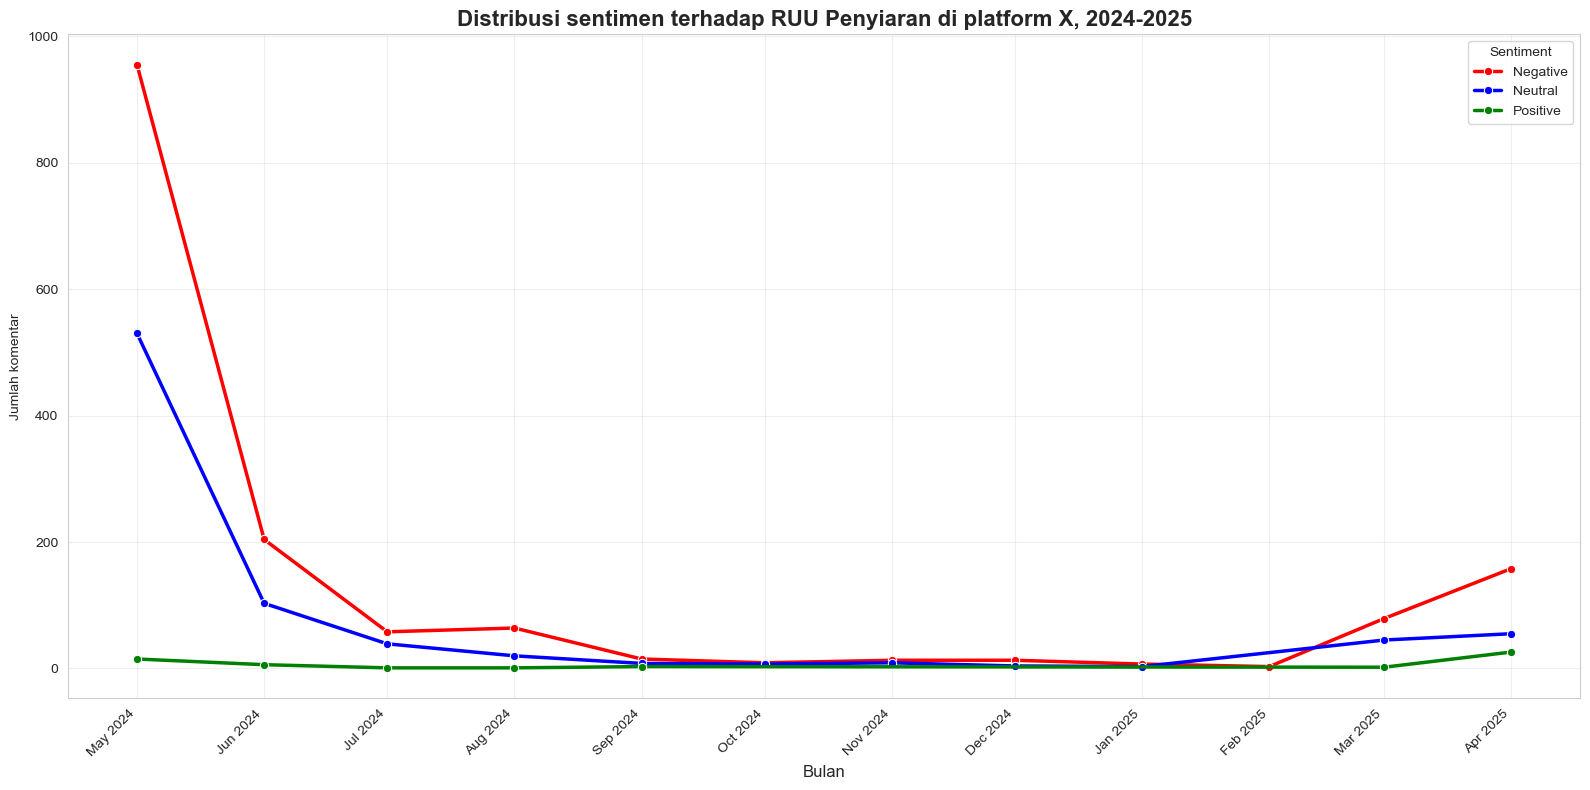

In [21]:
# Visualisasi distribusi sentimen dari waktu ke waktu

# Mempersiapkan dataframe untuk visualisasi time-series
df_waktu = df_sentiment.copy()
df_waktu['waktu'] = pd.to_datetime(df_penyiaran['createdAt'])
df_waktu.dropna(subset=['waktu'], inplace=True)

# Membuat bins bulanan
df_waktu['month'] = df_waktu['waktu'].dt.to_period('M')
sentimen_bulanan_long = df_waktu.groupby(['month', 'sentiment_adjusted']).size().reset_index(name='count')
sentimen_bulanan_long['month'] = sentimen_bulanan_long['month'].dt.to_timestamp()

# Visualisasi dengan seaborn

# Style dan ukuran plot
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(16,8))

sentiment_palette = {
    'Negative': 'red',
    'Positive': 'green',
    'Neutral': 'blue'
}

# Membuat plot
sns.lineplot(
    data=sentimen_bulanan_long,
    x='month',
    y='count',
    hue='sentiment_adjusted',
    ax=ax,
    linewidth=2.5,
    marker='o',
    markersize=6,
    palette=sentiment_palette
)

# Mengatur label
ax.set_title('Distribusi sentimen terhadap RUU Penyiaran di platform X, 2024-2025', fontsize=16, fontweight='bold')
ax.set_xlabel('Bulan', fontsize=12)
ax.set_ylabel('Jumlah komentar', fontsize=10)
ax.grid(True, alpha=0.3)
ax.legend(title='Sentiment', title_fontsize=10)

# Mempercantik label sumbu X (bulan dan tahun)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

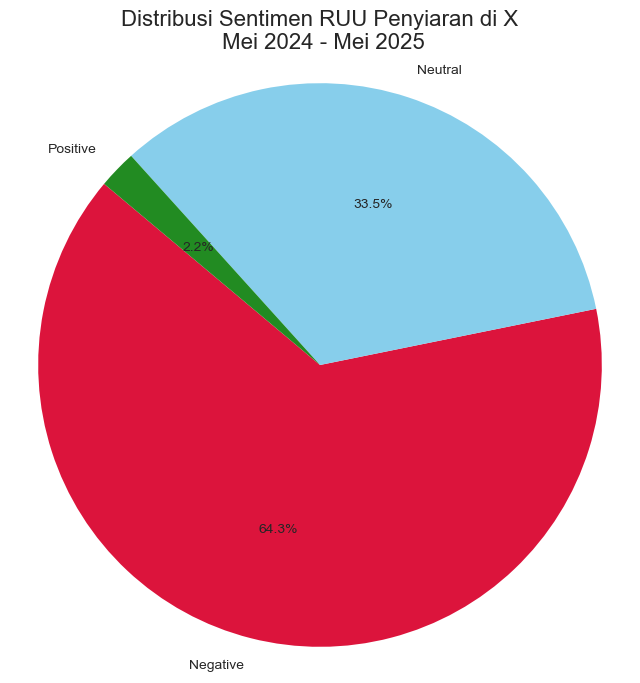

In [96]:
# Visualisasi distribusi sentimen

# Visualisasi analisis sentimen

sentiment_counts = df_sentiment['sentiment_adjusted'].value_counts()
color_map = {
    'Positive': 'forestgreen',  # Hijau
    'Neutral':  'skyblue',      # Biru
    'Negative': 'crimson'       # Merah
}
ordered_colors = [color_map.get(label, '#CCCCCC') for label in sentiment_counts.index]

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(8, 8))
plt.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=ordered_colors  # Menggunakan daftar warna kustom
)

plt.title('Distribusi Sentimen RUU Penyiaran di X\n Mei 2024 - Mei 2025', fontsize=16)
plt.axis('equal')
plt.show()


--- Memproses Word Cloud untuk Sentimen: 'Negative' ---


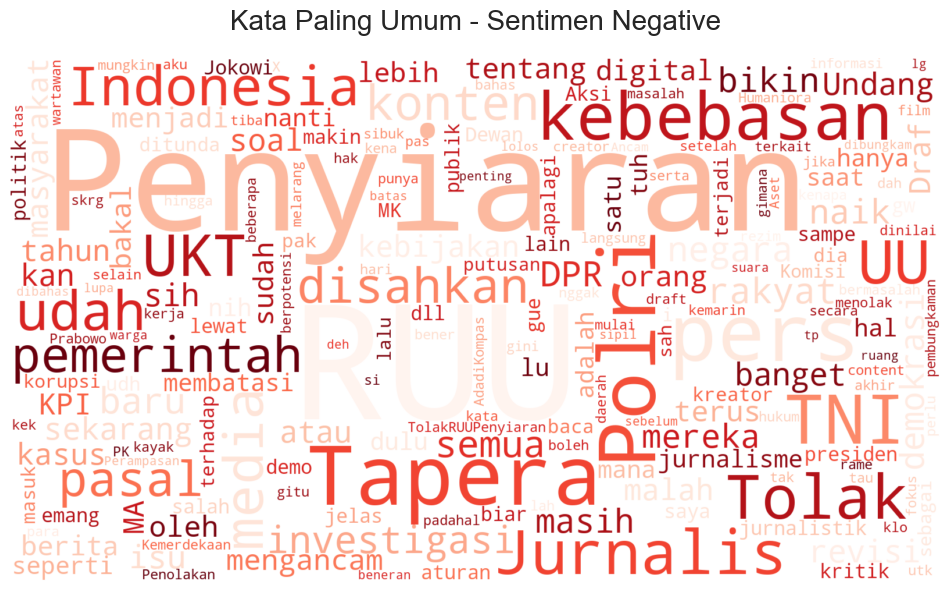


--- Memproses Word Cloud untuk Sentimen: 'Neutral' ---


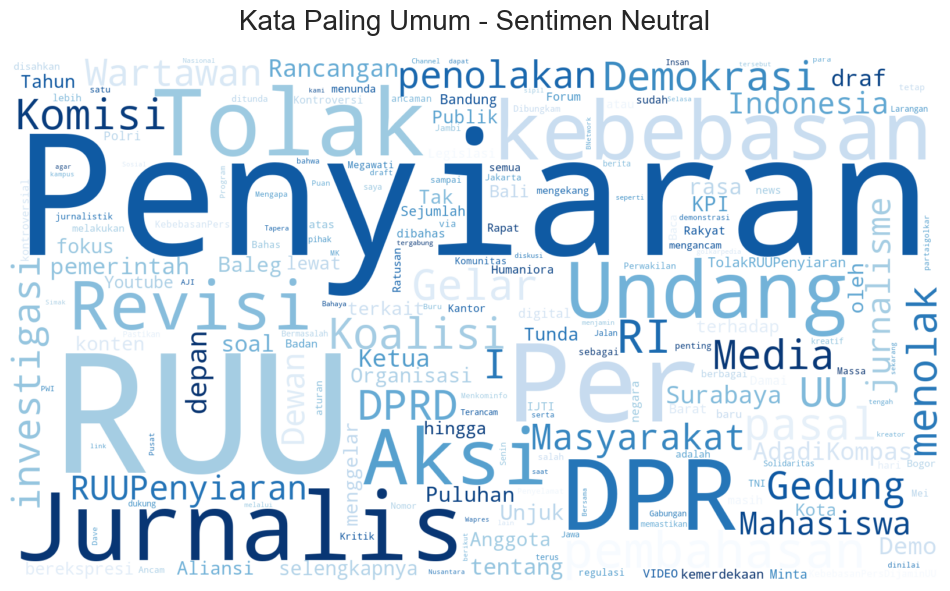


--- Memproses Word Cloud untuk Sentimen: 'Positive' ---


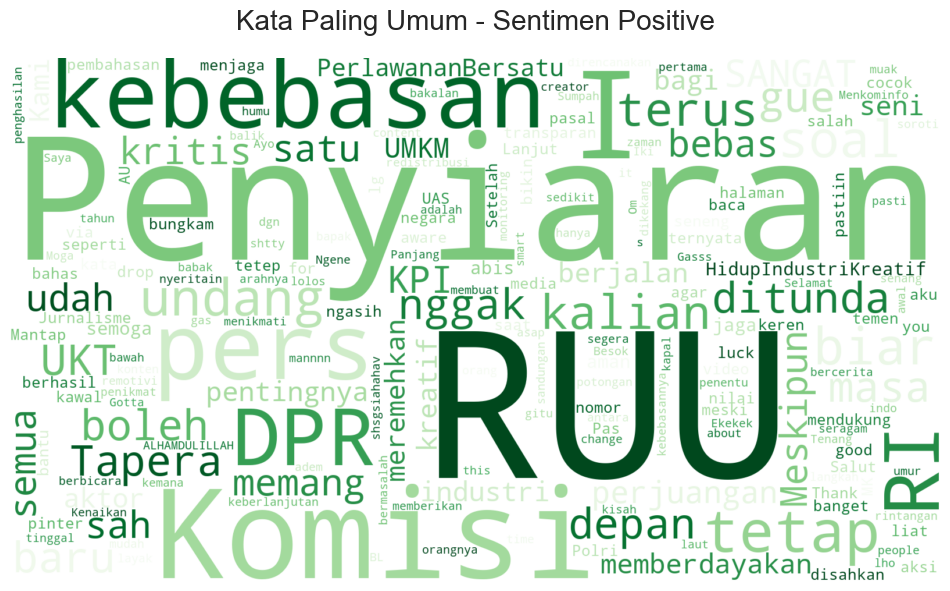

In [27]:
# Word cloud masing-masing sentimen

stopwords_indonesia = set([
    'di', 'dan', 'ini', 'itu', 'ke', 'dari', 'dengan', 'untuk', 'pada', 'juga', 'ya', 'ga', 'bgt',
    'akan', 'tidak', 'telah', 'karena', 'yg', 'gak', 'nya', 'aja', 'saja', 'lagi', 'dalam', 'belum',
    'yang', 'ke', 'ada', 'https://t', 'co', 'jadi', 'buat', 'kalau', 'kok', 'mari', 'tapi', 'apa', 'mau',
    'jangan', 'harus', 'bukan', 'kita', 'bisa', 'sama', 'berarti', 'lingkungan', 'cuma', 'kalo', 'banyak'
])
sentiments = df_sentiment['sentiment_adjusted'].unique()
color_map = {
    'Positive': 'Greens',
    'Neutral': 'Blues',
    'Negative': 'Reds'
}

for sentiment in sentiments:
    print(f"\n--- Memproses Word Cloud untuk Sentimen: '{sentiment}' ---")
    subset_text = " ".join(df_sentiment[df_sentiment['sentiment_adjusted'] == sentiment]['text_bersih'])
    if not subset_text.strip():
        print(f"--> Teks kosong, word cloud untuk '{sentiment}' dilewati.")
        continue
    wordcloud = WordCloud(
        width=1600,
        height=900,
        background_color='white',
        stopwords=stopwords_indonesia,
        colormap=color_map.get(sentiment, 'viridis'), # Ambil warna dari map
        min_font_size=10,
        max_words=200,
        relative_scaling=0.5,
        collocations=False  
    ).generate(subset_text)

    plt.figure(figsize=(12, 8)) # Buat figur baru di setiap iterasi
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Kata Paling Umum - Sentimen {sentiment}', fontsize=20, pad=20)
    plt.axis("off") # Hilangkan sumbu x dan y
    plt.show()

In [7]:
# Pre-processing untuk topic modeling (di Google Colab)

import json

with open("docs_tpm.json", "w", encoding="utf-8") as f:
    json.dump(texts, f, ensure_ascii=False, indent=2)


### Analisis Jejaring Sosial

In [101]:
# SNA pre-processing

df_sna = pd.read_csv('combined_penyiaran_tweets.csv')
df_sna['text'] = df_sna['text'].fillna('')
edges = []
nodes_set = set()

for index, row in df_sna.iterrows():
    source_user = row.get('author/userName')
    if not isinstance(source_user, str):
        continue
    nodes_set.add(source_user)
    
    tweet_text = row['text']
    mentioned_users = re.findall(r'@(\w+)', tweet_text)
    for target_user in mentioned_users:
        if not tweet_text.startswith(f'RT @{target_user}'):
            nodes_set.add(target_user)
            edges.append({'Source': source_user, 'Target': target_user, 'Type': 'Mention'})

    reply_target = row.get('inReplyToUserName')
    if isinstance(reply_target, str) and reply_target != "":
        nodes_set.add(reply_target)
        edges.append({'Source': source_user, 'Target': reply_target, 'Type': 'Reply'})
        
    if tweet_text.startswith('RT @'):
        retweet_target_search = re.search(r'RT @(\w+):', tweet_text)
        if retweet_target_search:
            retweet_target = retweet_target_search.group(1)
            nodes_set.add(retweet_target)
            edges.append({'Source': source_user, 'Target': retweet_target, 'Type': 'Retweet'})

    quote_target = row.get('quotedTweet/user/userName')
    if isinstance(quote_target, str) and quote_target != "":
        nodes_set.add(quote_target)
        edges.append({'Source': source_user, 'Target': quote_target, 'Type': 'Quote'})

print(f"Ekstraksi selesai. Ditemukan {len(nodes_set)} akun unik dan {len(edges)} total interaksi.")

/var/folders/_9/2hwxwfmd0qg0nfmbgvyy3pmm0000gn/T/ipykernel_97199/429538286.py:3: DtypeWarning:

Columns (0,1,2,10,12,13,14,15,20,31,34,37,40,43,46,49,52,55,58,61,64,67,78,79,82,83,84,87,93,94,95,96,102,107,120,145,148,151,152,153,156,157,158,161,166,171,206,211,234,239,264,266,292,294,318,322,323,346,350,351,374,378,379,404,407,430,434,435,457,462,470,475,485,487,488,496,500,501,509,511,513,514,524,526,527,537,539,540,548,550,552,553,563,566,576,579,592,602,604,605,613,615,617,618,626,628,630,631,641,643,644,646,652,654,659,669,670,672,678,680,700,705,708,719,722,724,725,726,727,728,729,730,731,732,734,735,736,738,739,740,744,745,746,749,750,751,765,766,767,769,770,771,773,774,775,780,781,782,784,785,786,885,886,888,889,891,892,894,895,897,898,908,909,910,911,979,980,981,982,983,984,1011,1012,1040,1041,1042,1043,1111,1112,1113,1114,1115,1116,1143,1144,1172,1173,1174,1175,1243,1244,1245,1246,1247,1248,1275,1276,1315,1316,1317,1318,1319,1320,1321,1345,1346,1351,1369,1371,1374,1384,1389,1

Ekstraksi selesai. Ditemukan 1982 akun unik dan 971 total interaksi.


In [102]:
# Membuat dataframe untuk SNA

nodes_df = pd.DataFrame(list(nodes_set), columns=['Id'])
nodes_df['Label'] = nodes_df['Id'] 
edges_df = pd.DataFrame(edges)

if not edges_df.empty:
    weighted_edges_df = edges_df.groupby(['Source', 'Target']).size().reset_index(name='Weight')
    print(f"Berhasil membuat {len(weighted_edges_df)} hubungan unik dengan bobot.")
else:
    weighted_edges_df = pd.DataFrame(columns=['Source', 'Target', 'Weight'])
    print("Tidak ada interaksi mention yang ditemukan untuk membuat file edges.")

nodes_df.to_csv('nodes.csv', index=False)
weighted_edges_df.to_csv('edges.csv', index=False)

Berhasil membuat 871 hubungan unik dengan bobot.


Ada buzzer potential dengan akun bernama @brfelindra. 

In [28]:
# Checking dua postingan buzzer

buzzer_df = pd.read_csv("SNA/buzzer.csv")
buzzer_df.head(10)

,id,url,text,createdAt,author.profilePicture,retweetCount,replyCount,likeCount,quoteCount,viewCount,bookmarkCount,source,lang,isReply,isRetweet,isQuote,isPinned
0,1907190697113096623,https://x.com/brfelindra/status/19071906971130...,Komisi I DPR RI Pastikan RUU Penyiaran Tidak M...,Tue Apr 01 21:57:50 +0000 2025,https://pbs.twimg.com/profile_images/116743026...,221,237,231,0,2492,0,"<a href=""https://mobile.twitter.com"" rel=""nofo...",in,False,False,False,False
1,1907373006802080020,https://x.com/arya_ptraaa/status/1907373006802...,@brfelindra Gelombang diskusi bareng Komisi I ...,Wed Apr 02 10:02:16 +0000 2025,https://pbs.twimg.com/profile_images/169638268...,0,0,0,0,3,0,NaN,in,True,NaN,NaN,False
2,1907367597987057701,https://x.com/hengki_setiabdi/status/190736759...,@brfelindra Kebebasan pers tetap eksis berkat ...,Wed Apr 02 09:40:47 +0000 2025,https://pbs.twimg.com/profile_images/170005740...,0,0,0,0,1,0,NaN,in,True,NaN,NaN,False
3,1907365204947578922,https://x.com/risma_amaliya77/status/190736520...,@brfelindra Komisi I punya langkah pasti demi ...,Wed Apr 02 09:31:16 +0000 2025,https://pbs.twimg.com/profile_images/170218374...,0,0,0,0,4,0,NaN,in,True,NaN,NaN,False
4,1907361304719094243,https://x.com/maulana_ishann/status/1907361304...,@brfelindra Terima kasih Komisi I DPR sudah ja...,Wed Apr 02 09:15:46 +0000 2025,https://pbs.twimg.com/profile_images/169685445...,0,0,0,0,10,0,NaN,in,True,NaN,NaN,False
5,1907358653017104497,https://x.com/krisna_bakti52/status/1907358653...,@brfelindra Seneng liat Komisi I DPR RI fokus ...,Wed Apr 02 09:05:14 +0000 2025,https://pbs.twimg.com/profile_images/170075708...,0,0,0,0,13,0,NaN,in,True,NaN,NaN,False
6,1907349576618852425,https://x.com/remmy_purba2/status/190734957661...,@brfelindra Pengawalan ketat dari Komisi I DPR...,Wed Apr 02 08:29:10 +0000 2025,https://pbs.twimg.com/profile_images/171888816...,0,0,0,0,7,0,NaN,in,True,NaN,NaN,False
7,1907342600576860437,https://x.com/astrida_kaumah4/status/190734260...,"@brfelindra Kalian pionir kebebasan pers, Komi...",Wed Apr 02 08:01:27 +0000 2025,https://pbs.twimg.com/profile_images/169642766...,0,0,0,0,13,0,NaN,in,True,NaN,NaN,False
8,1907341776567857377,https://x.com/hana_ps03/status/190734177656785...,"@brfelindra Komisi I DPR RI take a stand, kebe...",Wed Apr 02 07:58:10 +0000 2025,https://pbs.twimg.com/profile_images/170148006...,0,0,0,0,8,0,NaN,in,True,NaN,NaN,False
9,1907341175025217841,https://x.com/silvi_astuti47/status/1907341175...,@brfelindra Tepuk tangan buat DPR yang benar-b...,Wed Apr 02 07:55:47 +0000 2025,https://pbs.twimg.com/profile_images/170184346...,0,0,0,0,4,0,NaN,in,True,NaN,NaN,False


In [52]:
# Engagement buzzer

buzzer_engagement = buzzer_df[["retweetCount", "replyCount", "likeCount", "quoteCount", "viewCount"]]
buzzer_engagement = buzzer_engagement.sort_values(by = "replyCount").iloc[3:]
buzzer_engagement.describe()

,retweetCount,replyCount,likeCount,quoteCount,viewCount
count,85.000000,85.000000,85.000000,85.0,85.000000
mean,5.094118,5.435294,5.329412,0.0,56.823529
std,33.018618,35.234401,34.543068,0.0,328.554380
min,0.000000,0.000000,0.000000,0.0,1.000000
25%,0.000000,0.000000,0.000000,0.0,3.000000
50%,0.000000,0.000000,0.000000,0.0,5.000000
75%,0.000000,0.000000,0.000000,0.0,10.000000
max,221.000000,237.000000,231.000000,0.0,2492.000000


<Axes: >

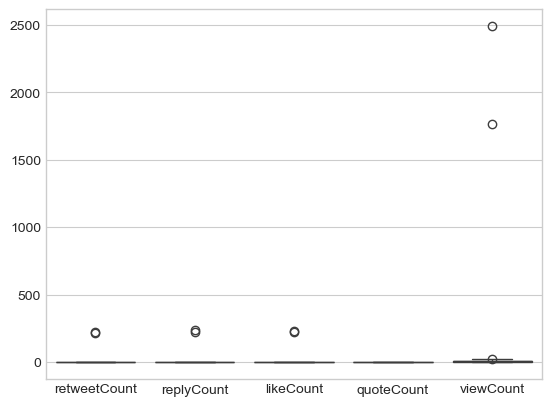

In [53]:
sns.boxplot(buzzer_engagement)

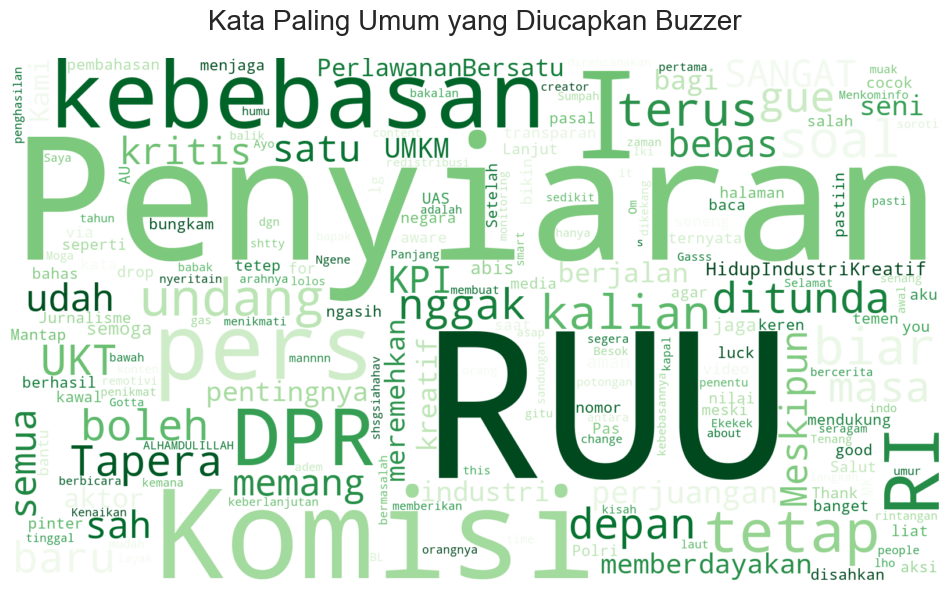

In [54]:
# Wordcloud buzzer

buzzer_df["text_bersih"] = buzzer_df["text"].astype(str).apply(bersihkan_teks)
subset_buzzer = " ".join(buzzer_df["text_bersih"])

wordcloud_buzzer = WordCloud(
    width=1600,
    height=900,
    background_color='white',
    stopwords=stopwords_indonesia,
    colormap=color_map.get(sentiment, 'viridis'), # Ambil warna dari map
    min_font_size=10,
    max_words=200,
    relative_scaling=0.5,
    collocations=False  
).generate(subset_text)

plt.figure(figsize=(12, 8)) # Buat figur baru di setiap iterasi
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Kata Paling Umum yang Diucapkan Buzzer", fontsize=20, pad=20)
plt.axis("off") # Hilangkan sumbu x dan y
plt.show()